In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# reading in the full dataset with dft descriptors
bmc_data = pd.read_csv('data/dft_robert_input_8descp.csv')
tsa1_bmcs = pd.read_csv('data/selected_bmcs_for_tsa1.csv')
tsa1_bmc_list = tsa1_bmcs['Name'].to_list()

In [36]:
bmc_data.drop(columns=['Cofactor'],axis=1)
bmc_data['Cofactor'] = names

In [37]:
# classifying if bmcs were found in literature for coloring
previously_studied_bmcs = ['A1a', 'B1a', 'B1b', 'D1a', 'C1a', 'E1a', 'J1a',
                           'F1a', 'F1b', 'F2a', 'F5a', 'F3a', 'G1a', 'H1a',
                           'K1a', 'I1a']
pca_group = []
pca_coloring = []
pca_shape = []
pca_size = []
tsa1_color = []
tsa1_shape = []
tsa1_size = []

for idx,row in bmc_data.iterrows():
    if row['Cofactor'] in previously_studied_bmcs:
        pca_group.append('Studied')
        pca_coloring.append('#5c8625')
        pca_shape.append('*')
        pca_size.append(150)
    else:
        pca_group.append('Novel')
        pca_coloring.append('#a0a0a0')
        pca_shape.append('o')
        pca_size.append(100)
    if row['Cofactor'] in tsa1_bmc_list:
        tsa1_color.append('#000080')
        tsa1_shape.append('*')
        tsa1_size.append(150)
    else:
        tsa1_color.append('#a0a0a0')
        tsa1_shape.append('o')
        tsa1_size.append(100)
        

bmc_data['Grouping'] = pca_group
bmc_data['Coloring'] = pca_coloring
bmc_data['Shape'] = pca_shape

In [38]:
# removing cofactor identity from pca data
bmc_data_no_names = bmc_data.drop(columns=['Cofactor','Grouping','Coloring','Shape'],axis=1)

In [39]:
# standardizing the data before pca
bmc_data_standardized = (bmc_data_no_names - bmc_data_no_names.mean()) / bmc_data_no_names.std()
# removing columns with no variance or one-hot encoding
column_drop = bmc_data_standardized.columns[bmc_data_standardized.isna().any()].tolist()
pca_data = bmc_data_standardized.drop(columns=column_drop,axis=1)
# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(pca_data)

(-2.75, 4.25)

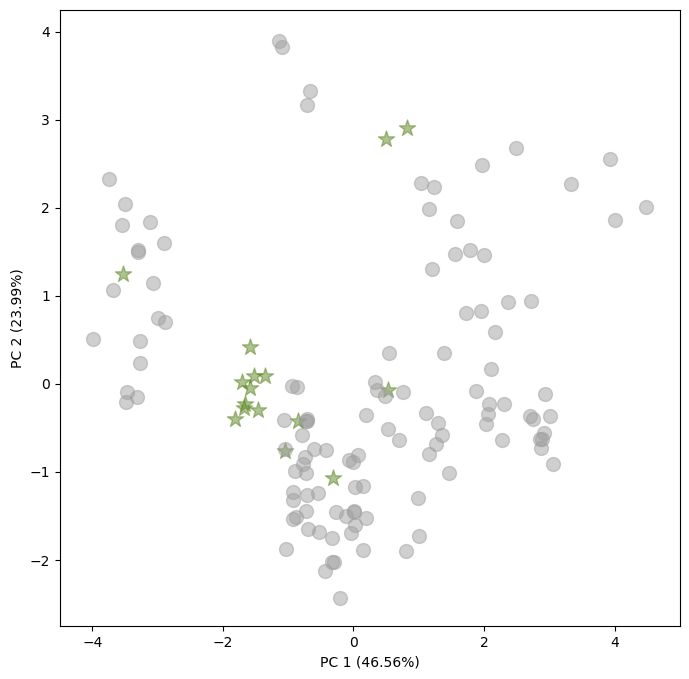

In [40]:
# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
i = 0
for bmc in range(0,len(pca_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=pca_shape[i],
                color=pca_coloring[i],
                alpha=0.5,
                s=pca_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('bmc_pca_full_pfi-descp.svg',dpi=400)

(-2.75, 4.25)

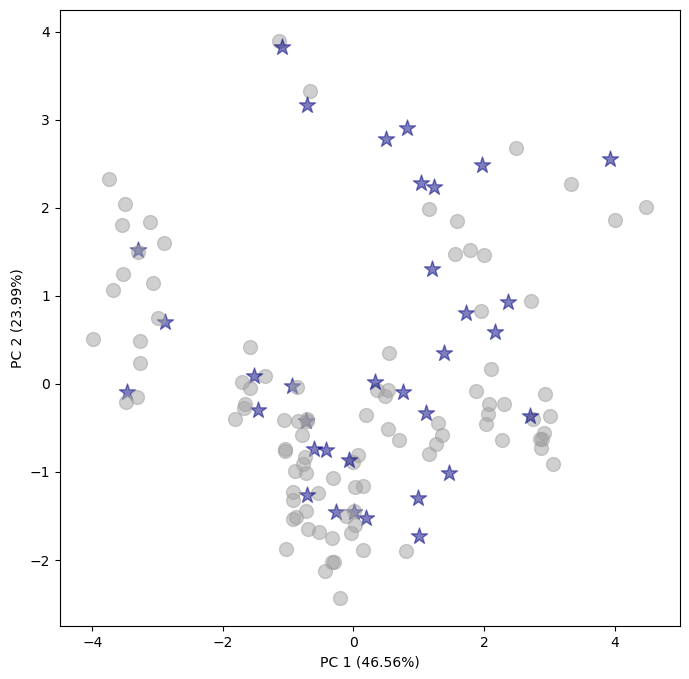

In [41]:
## COLORING BY IF CALCULATING TS A-I

# limiting dataset to DFT model descriptors
limited_pca_data = pca_data[['C4H_f-','C3_f-','C3sub_f-','C2_NBO-q','C3_NBO-q','C5_NBO-q','N1_NBO-q','C4H_NBO-q']]

# performing pca
pca = PCA(n_components = 0.95)
features_pca = pca.fit_transform(limited_pca_data)

# plotting pca plot
plt.figure(figsize=(8,8))
i = 0
for bmc in range(0,len(tsa1_shape)):
    plt.scatter(features_pca[i,0], features_pca[i,1],
                marker=tsa1_shape[i],
                color=tsa1_color[i],
                alpha=0.5,
                s=tsa1_size[i])
    i += 1
# labeling axes with explained variance for each pc
plt.xlabel(f'PC 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

# letting axes limits
plt.xlim(-4.5,5)
plt.ylim(-2.75,4.25)

# plt.savefig('bmc_pca_full_pfi-descp_byTSA1.svg',dpi=400)